Landmarks shape: (300,)
Labels shape: (300,)
Unique labels: [  1   3   6   8  10  11  12  14  18  19  25  26  30  32  33  36  40  41
  42  47  48  49  50  51  54  56  58  60  61  62  65  66  68  72  76  78
  79  80  83  85  86  91  92  99 102 103 104 105 107 111 115 116 118 119
 124 127 131 132 136 137 138 142 144 146 147 154 157 158 159 160 166 167
 170 171 173 176 177 178 184 188 189 194 200 201 207 208 210 212 213 215
 222 228 234 235 238 244 246 247 250 251 252 261 267 268 269 272 273 275
 276 278 279 280 284 291 293 295 300 301 304 305 306 308 310 311 314 320
 321 330 331 333 334 337 338 339 348 350 354 356 358 363 368 371 374 377
 379 381 384 388 406 409 412 421 428 431 434 437 438 439 440 443 448 456
 458 459 482 485 489 492 503 505 508 520 521 522 523 527 530 532 543 545
 546 554 555 557 565 567 571 575 580 588 591 595 613 614 617 619 630 632
 637 638 646 647 648 649 662 682 683 687 690 697 700 712 714 732 738 756
 757 759 765 778 779 781 782 783 791 801 802 806 810 812 823 827

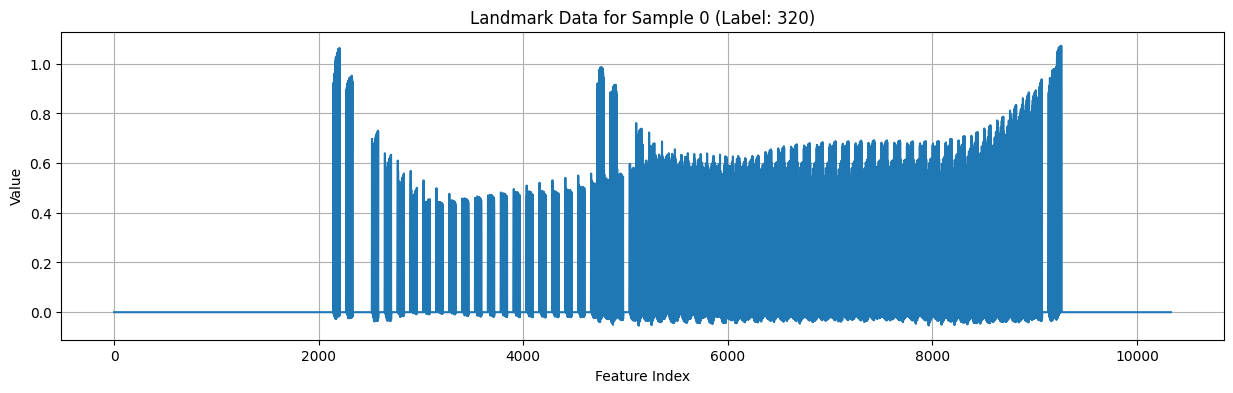

In [1]:
# Step 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define file paths
landmarks_path = 'MS_train/processed_data/landmarks_train.npy'
labels_path = 'MS_train/processed_data/labels_train.npy'

# Step 3: Check files exist
if not os.path.exists(landmarks_path) or not os.path.exists(labels_path):
    raise FileNotFoundError("One or both .npy files not found. Please check the paths.")

# Step 4: Load the saved NumPy arrays
landmarks = np.load(landmarks_path, allow_pickle=True)
labels = np.load(labels_path, allow_pickle=True)

# Step 5: Basic inspection
print(f"Landmarks shape: {landmarks.shape}")  # e.g., (160, 5292)
print(f"Labels shape: {labels.shape}")        # e.g., (160,)")
print(f"Unique labels: {np.unique(labels)}")

# Step 6: View a single sample's landmarks
sample_index = 0
sample_landmarks = landmarks[sample_index]
sample_label = labels[sample_index]

print(f"\nSample {sample_index} label: {sample_label}")
print(f"Sample {sample_index} landmark shape: {sample_landmarks.shape}")

# Step 7: Optional reshaping for better understanding (e.g., 42 frames, 21 landmarks, 3 coords)
# You might need to tweak this depending on how your data was flattened
try:
    reshaped = sample_landmarks.reshape(-1, 21, 3)
    print(f"Reshaped to (frames, landmarks, coords): {reshaped.shape}")
except ValueError:
    print("Could not reshape - landmark data may not be in expected format.")

# Step 8: Plot a flattened view of the sample
plt.figure(figsize=(15, 4))
plt.plot(sample_landmarks)
plt.title(f"Landmark Data for Sample {sample_index} (Label: {sample_label})")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


Sample #0
Label      : 320
Hash       : d9cbf448b24b260bdfe553b50d82eff9
Shape      : (10332,)


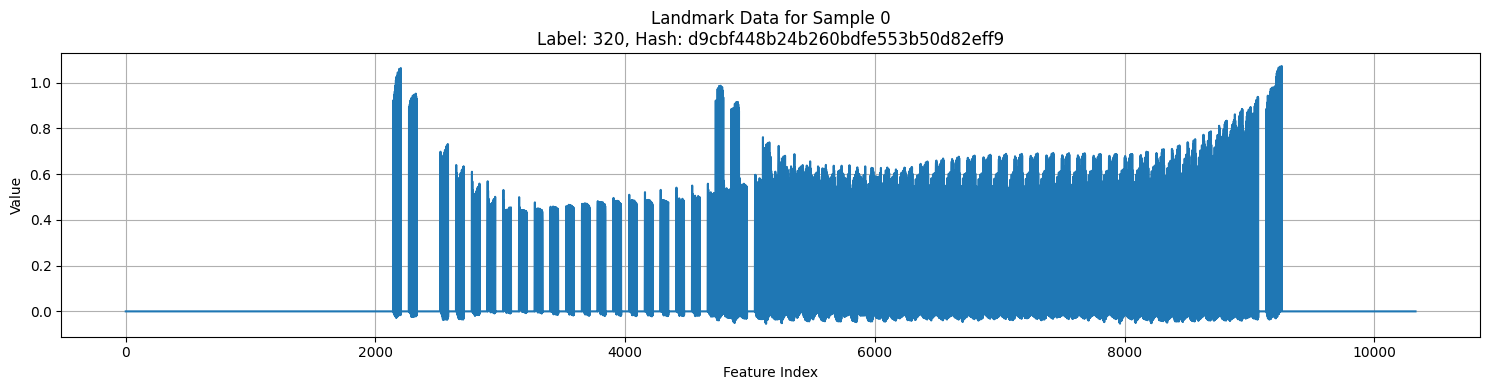

In [2]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Define paths
landmarks_path = 'MS_train/processed_data/landmarks_train.npy'
labels_path = 'MS_train/processed_data/labels_train.npy'
hashes_path = 'MS_train/processed_data/landmarks_train.npy.hashes'

# Step 3: Check if all files exist
if not (os.path.exists(landmarks_path) and os.path.exists(labels_path) and os.path.exists(hashes_path)):
    raise FileNotFoundError("One or more files (landmarks, labels, hashes) are missing.")

# Step 4: Load the data
landmarks = np.load(landmarks_path, allow_pickle=True)
labels = np.load(labels_path, allow_pickle=True)

with open(hashes_path, 'r') as f:
    hashes = [line.strip() for line in f.readlines()]

# Step 5: Verify consistency
if not (len(landmarks) == len(labels) == len(hashes)):
    raise ValueError("Mismatch in number of landmarks, labels, and hashes.")

# Step 6: Inspect a sample
sample_index = 0  # change this to view other samples
sample_landmarks = landmarks[sample_index]
sample_label = labels[sample_index]
sample_hash = hashes[sample_index]

print(f"Sample #{sample_index}")
print(f"Label      : {sample_label}")
print(f"Hash       : {sample_hash}")
print(f"Shape      : {sample_landmarks.shape}")

# Step 7: Visualize landmarks as a line plot (optional)
plt.figure(figsize=(15, 4))
plt.plot(sample_landmarks)
plt.title(f"Landmark Data for Sample {sample_index}\nLabel: {sample_label}, Hash: {sample_hash}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import os

def check_consistency(data_dir):
    labels = np.load(os.path.join(data_dir, 'labels_train.npy'), allow_pickle=True)
    landmarks = np.load(os.path.join(data_dir, 'landmarks_train.npy'), allow_pickle=True)
    
    print(f"Labels count: {len(labels)}")
    print(f"Landmarks count: {len(landmarks)}")
    
    with open(os.path.join(data_dir, 'landmarks_train.npy.hashes'), 'r') as f:
        hashes = f.read().splitlines()
    
    print(f"Hashes count: {len(hashes)}")
    
    return len(labels), len(landmarks), len(hashes)

labels_count, landmarks_count, hashes_count = check_consistency('MS_train/processed_data/')

Labels count: 300
Landmarks count: 300
Hashes count: 300


In [4]:
import shutil
def reconcile_data(data_dir):
    # Load all data
    labels = np.load(os.path.join(data_dir, 'labels_train.npy'), allow_pickle=True).tolist()
    landmarks = np.load(os.path.join(data_dir, 'landmarks_train.npy'), allow_pickle=True).tolist()
    
    with open(os.path.join(data_dir, 'landmarks_train.npy.hashes'), 'r') as f:
        hashes = f.read().splitlines()

    # Find minimum common length
    min_length = min(len(labels), len(landmarks), len(hashes))
    
    # Trim all to minimum length
    labels = labels[:min_length]
    landmarks = landmarks[:min_length]
    hashes = hashes[:min_length]

    # Backup original files
    shutil.copy('MS_train/processed_data/labels_train.npy', 'MS_train/processed_data/labels_train_backup.npy')
    shutil.copy('MS_train/processed_data/landmarks_train.npy', 'MS_train/processed_data/landmarks_train_backup.npy')
    shutil.copy('MS_train/processed_data/landmarks_train.npy.hashes', 'MS_train/processed_data/landmarks_train_backup.npy.hashes')

    # Save reconciled data
    np.save(os.path.join(data_dir, 'labels_train.npy'), np.array(labels))
    np.save(os.path.join(data_dir, 'landmarks_train.npy'), np.array(landmarks))
    with open(os.path.join(data_dir, 'landmarks_train.npy.hashes'), 'w') as f:
        f.write('\n'.join(hashes))

    print(f"Reconciled to {min_length} consistent samples")

In [5]:
def validate_hashes(data_dir):
    labels = np.load(os.path.join(data_dir, 'labels_train.npy'), allow_pickle=True)
    landmarks = np.load(os.path.join(data_dir, 'landmarks_train.npy'), allow_pickle=True)
    
    with open(os.path.join(data_dir, 'landmarks_train.npy.hashes'), 'r') as f:
        hashes = f.read().splitlines()

    # Verify all lengths match
    assert len(labels) == len(landmarks) == len(hashes), "Length mismatch after reconciliation"
    
    print("All files have consistent lengths")
    print(f"Final sample count: {len(labels)}")

In [18]:
# reconcile_data('MS_train/processed_data/')
# validate_hashes('MS_train/processed_data/')